In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
pwd

'/Users/akulkarni/dsc-phase-1-project'

In [98]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [99]:
print(title_basics_df.shape)
print(title_ratings_df.shape)
print(movie_gross_df.shape)

(146144, 6)
(73856, 3)
(3387, 5)


In [100]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [101]:
title_basics_df1 = title_basics_df.set_index('primary_title')

In [102]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [103]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [104]:
title_basics_df.isna().sum() / len(title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [105]:
title_ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [106]:
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [107]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [108]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [109]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### What are the highest domestic grossing movies?

In [110]:
df = movie_gross_df.join(title_basics_df1, on = 'title', how = 'left')

In [111]:
df.shape

(4147, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 3386
Data columns (total 10 columns):
title              4147 non-null object
studio             4142 non-null object
domestic_gross     4112 non-null float64
foreign_gross      2516 non-null object
year               4147 non-null int64
tconst             3366 non-null object
original_title     3366 non-null object
start_year         3366 non-null float64
runtime_minutes    3198 non-null float64
genres             3326 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 356.4+ KB


In [113]:
df.isna().sum() / len(df)

title              0.000000
studio             0.001206
domestic_gross     0.008440
foreign_gross      0.393296
year               0.000000
tconst             0.188329
original_title     0.188329
start_year         0.188329
runtime_minutes    0.228840
genres             0.197974
dtype: float64

In [114]:
domestic_gross_df = df.dropna(subset = ['domestic_gross'])

In [115]:
domestic_gross_df.isna().sum()

title                 0
studio                3
domestic_gross        0
foreign_gross      1631
year                  0
tconst              770
original_title      770
start_year          770
runtime_minutes     937
genres              810
dtype: int64

In [116]:
domestic_gross_df.sort_values(by = ['domestic_gross'], ascending = False, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
domestic_gross_df = domestic_gross_df.reset_index()

In [118]:
domestic_gross_df.head()

,index,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,NaN,NaN,NaN,NaN,NaN
1,3080,Black Panther,BV,700100000.0,646900000,2018,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
2,3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
3,1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
4,727,Marvel's The Avengers,BV,623400000.0,895500000,2012,NaN,NaN,NaN,NaN,NaN


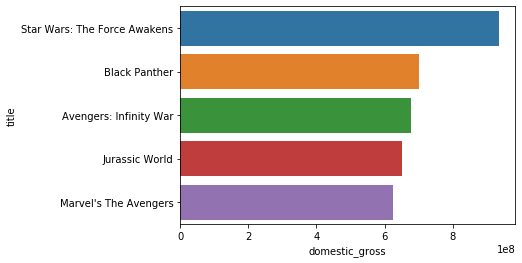

In [119]:
sns.barplot(x = 'domestic_gross', y = 'title', data = domestic_gross_df.head())

### What are the highest grossing studios?

In [120]:
top_studios_df = domestic_gross_df.groupby(by = 'studio').sum().reset_index()

In [121]:
top_studios_df.sort_values(by = ['domestic_gross'], inplace=True, ascending=False)

In [122]:
top_studios_df

,studio,index,domestic_gross,year,start_year,runtime_minutes
36,BV,185728,2.313693e+10,253735,213461.0,10509.0
236,Uni.,330986,1.718983e+10,406857,366608.0,17466.0
244,WB,247974,1.400695e+10,326241,255763.0,13555.0
93,Fox,262205,1.290930e+10,346381,308145.0,15149.0
183,Par.,188682,8.897377e+09,235644,193344.0,9996.0
...,...,...,...,...,...,...
62,DR,12166,5.600000e+03,14098,14103.0,566.0
34,BSM,1119,5.100000e+03,2012,0.0,0.0
222,TAFC,2303,4.600000e+03,2015,2014.0,100.0
111,Hiber,3076,3.600000e+03,2017,0.0,0.0


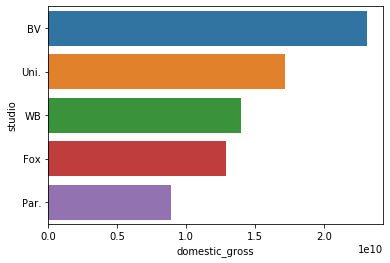

In [123]:
sns.barplot(x = 'domestic_gross', y = 'studio', data=top_studios_df[0:5])

In [126]:
#df1 = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t')